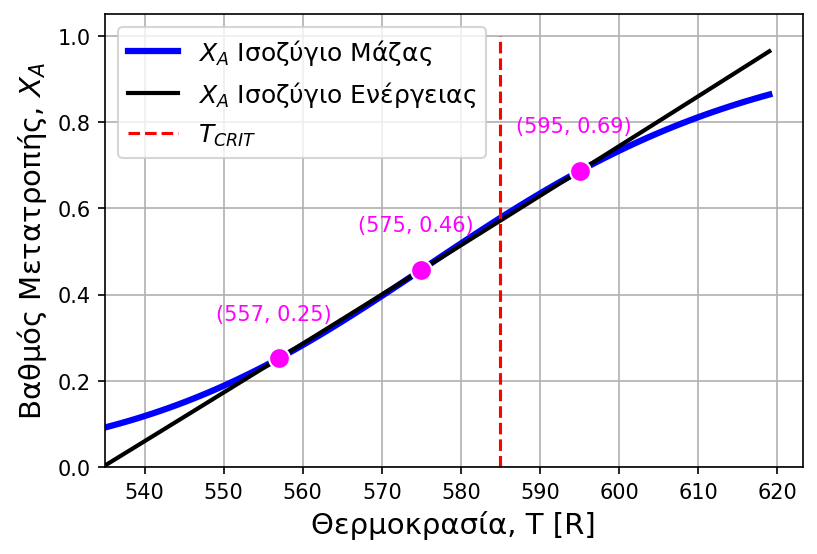

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Variable Model Parameters (Change these to reacreate the graphs from the lecture slides)
Qo = 326.3           # Volumetric Flowrate (Inlet) (ft^3/h) - Default 326.3
To = 534.67          # Reactor Inlet Temperature (R)        - Default 534.67

# Fixed Model Parameters
V = 40.1             # Reactor Volume (ft^3)
Tr = 527.67          # Reference Temperature (R)
CpA = 35             # Heat Capacity Propylene Oxide (BTU/lb-mol/R)
CpB = 18             # Heat Capacity Water (BTU/lb-mol/R)
CpC = 46             # Heat Capacity Propylene Glycol (BTU/lb-mol/R)
CpM = 19.5           # Heat Capacity Methanol (BTU/lb-mol/R)
k0 = 16.96e12        # Frequency coefficient (1/h)
E = 32400            # Activation Energy (kcal/kmol)
DHr_tr = 36000       # Heat of Reaction (kcal/kmol)
FAo = 43.04          # Propylene Oxide Inlet Stream (lb-mol/ft^3)
FBo = 804.75         # Water Inlet Stream (lb-mol/ft^3)
FMo = 71.89          # Methanol Inlet Stream (lb-mol/ft^3)
CAo = 0.132          # Inlet Stream Concentration Propylene Oxide (lb-mol/ft^3)
R = 1.987            # Universal Gas Constant (BTU/lb-mol/R)

# Temperature range (Rankine)
T = np.arange(535, 620)  # Temperature range from 535 to 640 R

# Auxiliary Equations
tau = V / Qo
k = k0 * np.exp(-E / (R * T))

# Mass and Energy Balances
X_mb = tau * k / (1 + tau * k)
X_eb = (FAo / FAo * CpA + FBo / FAo * CpB + FMo / FAo * CpM) * (T - To) / (DHr_tr + (CpC - CpA - CpB) * (T - Tr))

# Find intersection points
difference = np.abs(X_mb - X_eb)
min_indices = np.where(difference < 0.0004)[0]  # Intersection points with a small threshold

# Get the corresponding Temperature (T) and Conversion (X) values at these indices
intersection_T = T[min_indices]
intersection_X = X_mb[min_indices]

# Plotting
plt.figure(dpi=150)
plt.plot(T, X_mb, 'b-', linewidth=3, label='$X_A$ Ισοζύγιο Μάζας')
plt.plot(T, X_eb, 'k-', linewidth=2, label='$X_A$ Ισοζύγιο Ενέργειας')
plt.plot([585, 585], [0, 1], 'r--', label='$T_{{CRIT}}$', linewidth=1.5)
plt.grid(True)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=14)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=14)

# Mark and label intersection points
plt.scatter(intersection_T, intersection_X, color='magenta', s=100, edgecolor='white', zorder=5)
for i in range(len(intersection_T)):
    plt.text(intersection_T[i]-8, intersection_X[i]+0.08, f'({intersection_T[i]:.0f}, {intersection_X[i]:.2f})', 
             color='magenta', fontsize=10, ha='left', va='bottom')

plt.legend(fontsize=12)
plt.xlim(left=535)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 275
#plt.title("Βαθμός Μετατροπής vs Θερμοκρασία")
plt.show()


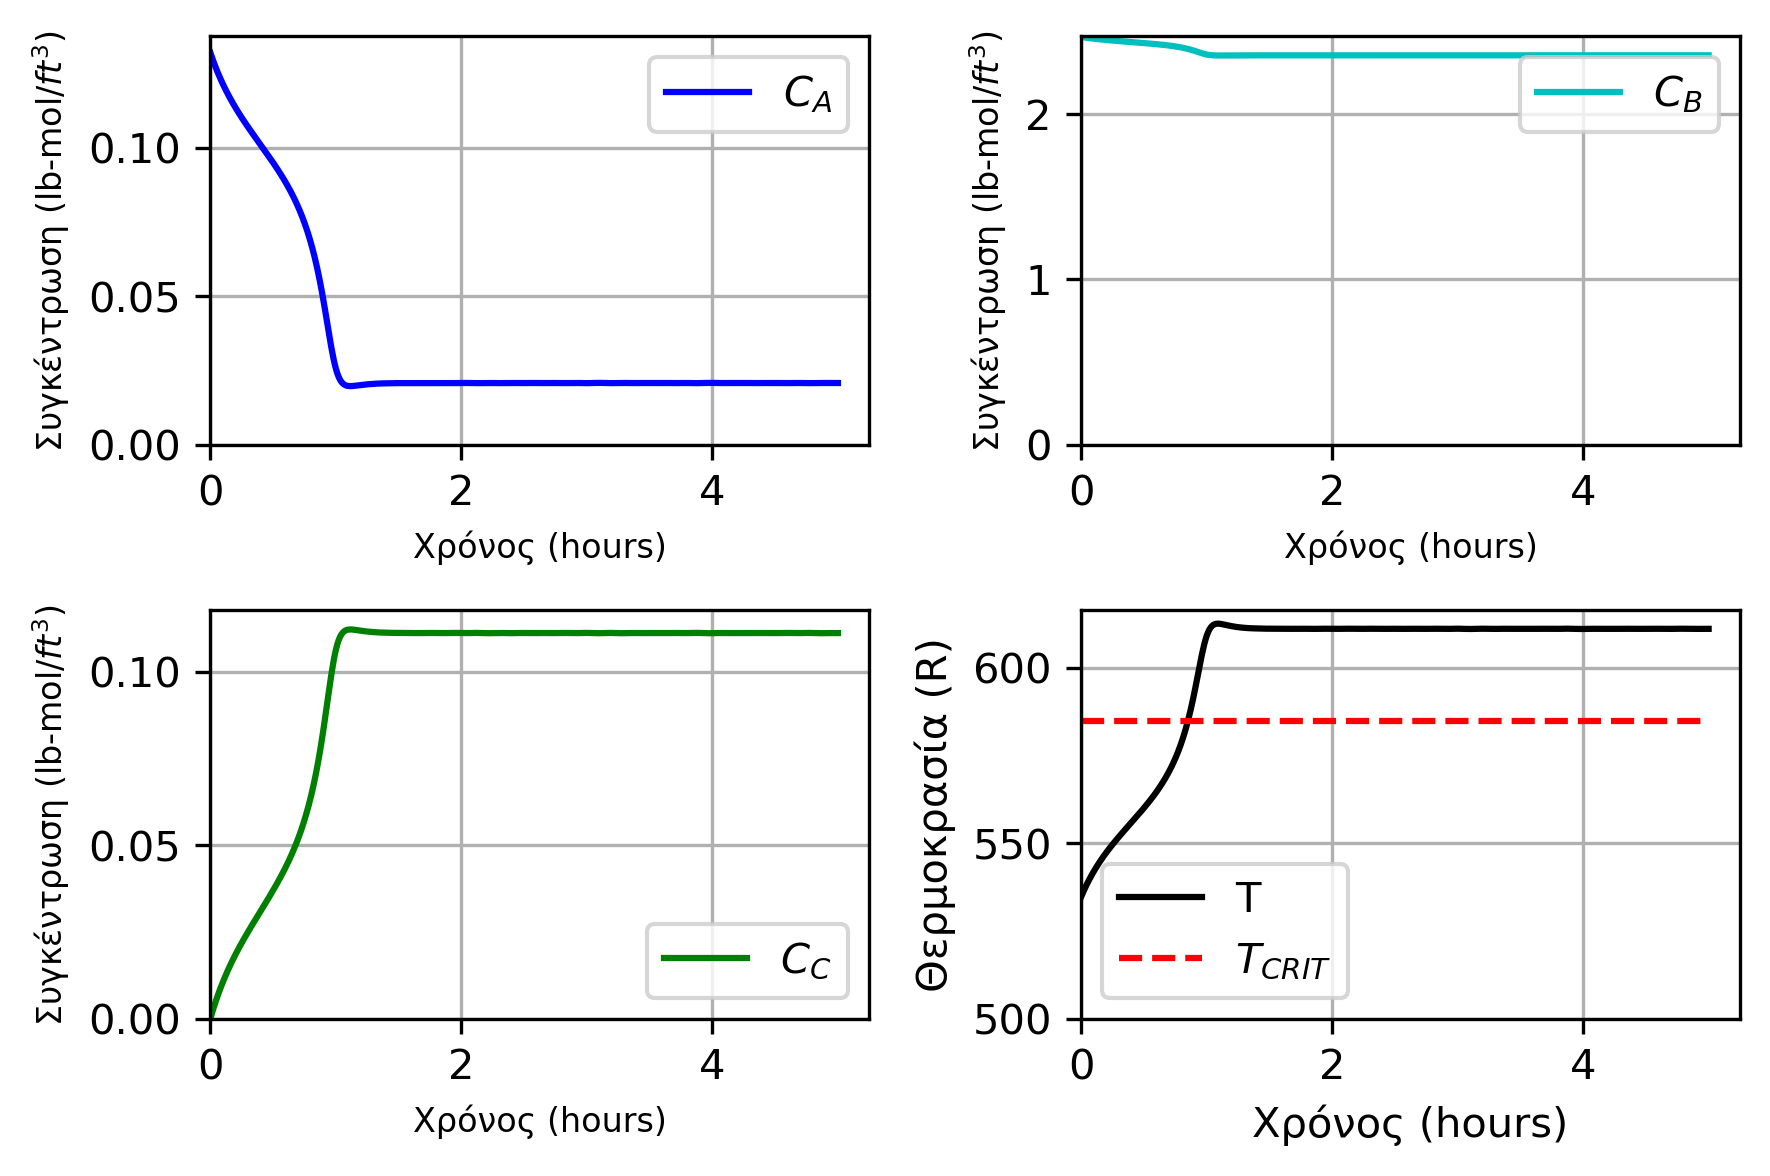

In [75]:
# Define & Solve the system of ODEs
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def SXA_I_Example_7p7(t, x, To):
    # Model Parameters
#    To = 534.67         # Reactor Inlet Temperature (R)
    CpA = 35            # Heat Capacity Propylene Oxide (BTU/lb-mol/F)
    CpB = 18            # Heat Capacity Water (BTU/lb-mol/F)
    CpC = 46            # Heat Capacity PG (BTU/lb-mol/F)
    CpM = 19.5          # Heat Capacity Methanol ((BTU/lb-mol/F)
    k0 = 16.96e12       # Frequency coefficient (1/h)
    E = 32400           # Activation Energy (BTU/lb-mol)
    DHrTo = -36000      # Heat of Reaction at To (BTU/lb-mol)
    V = 40.1            # Reactor Volume (ft^3)
    QAo = 93.24 / 2     # Propylene Oxide Inlet Stream (ft^3/h)
    QBo = 233.1         # Water Inlet Stream (ft^3/h)
    QMo = 93.24 / 2     # Methanol Inlet Stream (ft^3/h)
    CAo = 0.132         # Inlet Stream Concentration Propylene Oxide (lb-mol/ft^3)
    FAo = 43.044        # Inlet Stream Molar flowrate Propylene Oxide (lb-mol/ft^3)
    FBo = 804.75        # Inlet Stream Molar flowrate Water (lb-mol/ft^3)
    FMo = 71.89         # Inlet Stream Molar flowrate Methanol (lb-mol/ft^3)
    R = 1.987           # Universal Gas Constant (BTU/lb-mol/R)

    # Variables
    CA, CB, CC, CM, T = x  # Unpack variables from input array x

    # Auxiliary Equations
    Qo = QAo + QBo + QMo
    k = k0 * np.exp(-E / (R * T))
    DHr = DHrTo + (CpC - CpA - CpB) * (T-527.67)

    # Differential Equations
    dCA_dt = Qo * (CAo - CA) / V - k * CA
    dCB_dt = Qo * (FBo/Qo - CB) / V - k * CA
    dCC_dt = -Qo * CC / V + k * CA
    dCM_dt = Qo * (FMo/Qo - CM) / V
    dT_dt = (-(FAo * CpA + FBo * CpB + FMo * CpM) * (T - To) - V * DHr * k * CA) / (CA * V * CpA + CB * V * CpB + CM * CpM * V)

    return [dCA_dt, dCB_dt, dCC_dt, dCM_dt, dT_dt]

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 5)  # time span in hours
t_eval = np.linspace(0, 5, 500)  # time points for evaluation

# Initial concentrations: [CA0]
initial_conditions = [0.132, 2.466, 0, 0.22, 534.67]  # Initial values for [CA]

# Set Reactor Inlet Temperature (R) - Default Value 534.67 R
To = 534.67

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_7p7, t_span, initial_conditions, args=(To,), t_eval=t_eval)

# Extract the solution for each component
CA = sol.y[0, :]
CB = sol.y[1, :]
CC = sol.y[2, :]
CM = sol.y[3, :]
T  = sol.y[4, :]
time = sol.t

# Plotting results in subplots
plt.figure(dpi=300)

# Subplot 1: C_A vs t
plt.subplot(2, 2, 1)
plt.plot(time, CA, 'b-', linewidth=1.5)
plt.legend(['$C_A$'], fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=8)
plt.ylabel('Συγκέντρωση (lb-mol/$ft^3$)', fontsize=8)

# Subplot 2: C_B vs t
plt.subplot(2, 2, 2)
plt.plot(time, CB, 'c-', linewidth=1.5)
plt.legend(['$C_B$'], fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=8)
plt.ylabel('Συγκέντρωση (lb-mol/$ft^3$)', fontsize=8)

# Subplot 3: C_C vs t
plt.subplot(2, 2, 3)
plt.plot(time, CC, 'g-', linewidth=1.5)
plt.legend(['$C_C$'], fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.xlabel('Χρόνος (hours)', fontsize=8)
plt.ylabel('Συγκέντρωση (lb-mol/$ft^3$)', fontsize=8)

# Subplot 4: T vs t
plt.subplot(2, 2, 4)
plt.plot(time, T, 'k-', linewidth=1.5)
plt.plot([0, 5], [584.67, 584.67], 'r--', linewidth=1.5)
plt.legend(['T','$T_{{CRIT}}$'], fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=500)  # Y-axis starts at 275
plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Θερμοκρασία (R)', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


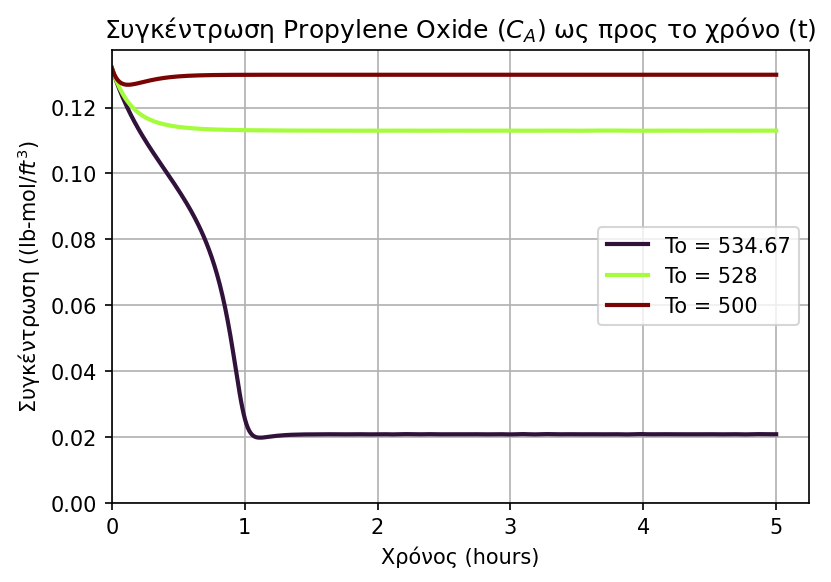

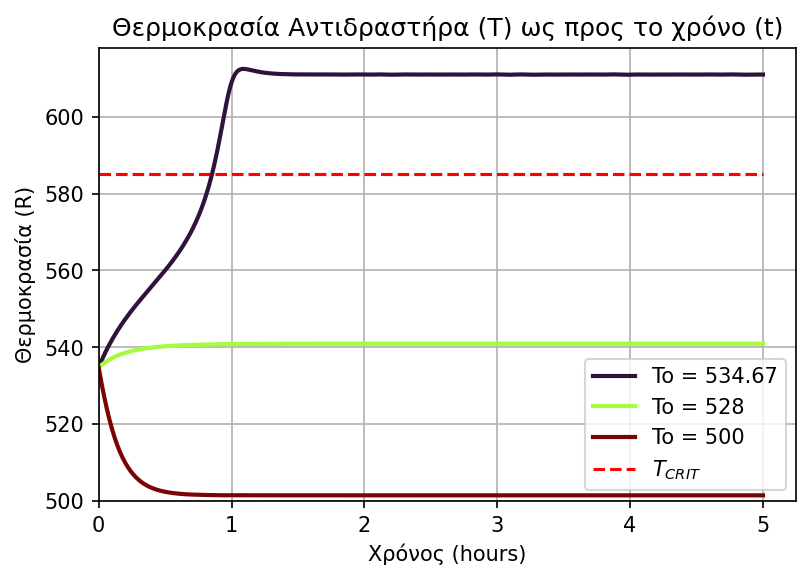

In [76]:
# Examine how different inlet stream Temperatures (To) affect the steady state

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 5)  # time span in hours
t_eval = np.linspace(0, 5, 500)  # time points for evaluation

# Initial concentrations: [CA0]
initial_conditions = [0.132, 2.466, 0, 0.22, 534.67]  # Initial values for [CA]

# Set Reactor Inlet Temperature (R) - Default Value 534.67 R
To = 534.67

# Set Reactor Inlet Temperature (R) - Default Value 297 K
To_Range = [534.67, 528, 500]
results = []  # To store the results for each combination

# Solve the ODE for Different Reactor Inlet stream temperatures
for To in To_Range:
    sol = solve_ivp(SXA_I_Example_7p7, t_span, initial_conditions, args=(To,), t_eval=t_eval)
    results.append((sol, f'To = {To}'))  # Store result and label

# Plotting Concentration Graphs (Figure 1)
plt.figure(dpi=150)
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(To_Range)))

for i, (sol, label) in enumerate(results):
    time = sol.t
    CA_values = sol.y[0]  # Concentration of A (CA) from the solution
    plt.plot(time, CA_values, color=colors[i], label=label, linewidth=2)

plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Συγκέντρωση ((lb-mol/$ft^3$)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.title("Συγκέντρωση Propylene Oxide ($C_A$) ως προς το χρόνο (t)")

# Plotting Temperature Graphs (Figure 2)
plt.figure(dpi=150)

for i, (sol, label) in enumerate(results):
    time = sol.t
    T_values = sol.y[4]   # Temperature (T) from the solution
    plt.plot(time, T_values, color=colors[i], label=label, linewidth=2)

plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Θερμοκρασία (R)', fontsize=10)
plt.plot([0, 5], [585, 585], 'r--', label='$T_{{CRIT}}$', linewidth=1.5)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=500)  # Y-axis starts at 200
plt.title("Θερμοκρασία Αντιδραστήρα (T) ως προς το χρόνο (t)")

# Display the plots
plt.show()


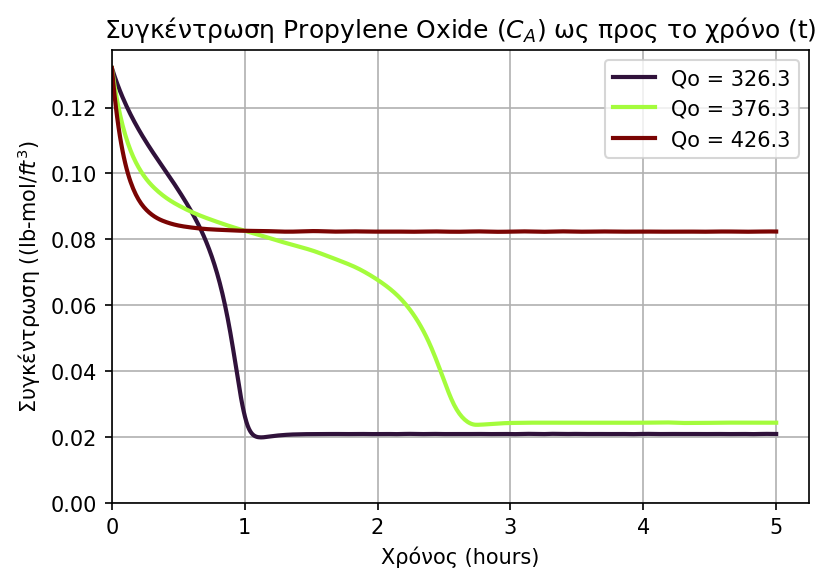

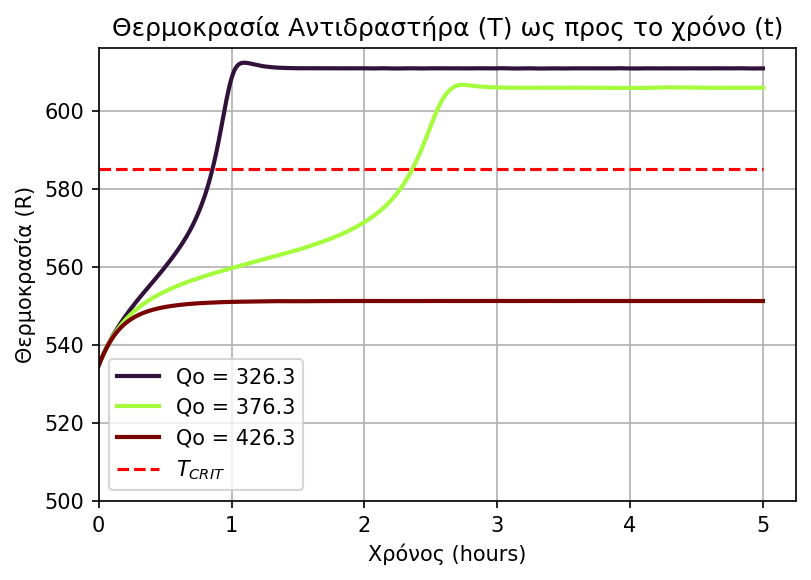

In [93]:
# Examine how different inlet stream Volumetric Flowrates (Qo) affect the steady state
def SXA_I_Example_7p7_Qo(t, x, Qo):
    # Model Parameters
    To = 534.67         # Reactor Inlet Temperature (R)
    CpA = 35            # Heat Capacity Propylene Oxide (BTU/lb-mol/F)
    CpB = 18            # Heat Capacity Water (BTU/lb-mol/F)
    CpC = 46            # Heat Capacity PG (BTU/lb-mol/F)
    CpM = 19.5          # Heat Capacity Methanol ((BTU/lb-mol/F)
    k0 = 16.96e12       # Frequency coefficient (1/h)
    E = 32400           # Activation Energy (BTU/lb-mol)
    DHrTo = -36000      # Heat of Reaction at To (BTU/lb-mol)
    V = 40.1            # Reactor Volume (ft^3)
    FAo = 43.044        # Inlet Stream Molar flowrate Propylene Oxide (lb-mol/ft^3)
    FBo = 804.75        # Inlet Stream Molar flowrate Water (lb-mol/ft^3)
    FMo = 71.89         # Inlet Stream Molar flowrate Methanol (lb-mol/ft^3)
    R = 1.987           # Universal Gas Constant (BTU/lb-mol/R)

    CAo = FAo / Qo      # Propylene Oxide Inlet Stream (ft^3/h)
    CBo = FBo / Qo      # Water Inlet Stream (ft^3/h)
    CMo = FMo / Qo      # Methanol Inlet Stream (ft^3/h)

    # Variables
    CA, CB, CC, CM, T = x  # Unpack variables from input array x

    # Auxiliary Equations
    k = k0 * np.exp(-E / (R * T))
    DHr = DHrTo + (CpC - CpA - CpB) * (T-527.67)

    # Differential Equations
    dCA_dt = Qo * (CAo - CA) / V - k * CA
    dCB_dt = Qo * (CBo - CB) / V - k * CA
    dCC_dt = -Qo * CC / V + k * CA
    dCM_dt = Qo * (CMo - CM) / V
    dT_dt = (-(FAo * CpA + FBo * CpB + FMo * CpM) * (T - To) - V * DHr * k * CA) / (CA * V * CpA + CB * V * CpB + CM * CpM * V)

    return [dCA_dt, dCB_dt, dCC_dt, dCM_dt, dT_dt]

# Set time span for the integration (e.g., from t=0 to t=10 hours)
t_span = (0, 5)  # time span in hours
t_eval = np.linspace(0, 5, 500)  # time points for evaluation

# Initial concentrations: [CA0]
initial_conditions = [0.132, 2.466, 0, 0.22, 534.67]  # Initial values for [CA]

# Set Reactor Inlet Volumetric Flowrates (Qo) - Default Value 326.3 ft3/h
Qo_Range = [326.3, 376.3, 426.3]
results = []  # To store the results for each combination

# Solve the ODE for Different Reactor Inlet Volumetric Flowrates (Qo)
for Qo in Qo_Range:
    sol = solve_ivp(SXA_I_Example_7p7_Qo, t_span, initial_conditions, args=(Qo,), t_eval=t_eval)
    results.append((sol, f'Qo = {Qo}'))  # Store result and label

# Plotting Concentration Graphs (Figure 1)
plt.figure(dpi=150)
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(To_Range)))

for i, (sol, label) in enumerate(results):
    time = sol.t
    CA_values = sol.y[0]  # Concentration of A (CA) from the solution
    plt.plot(time, CA_values, color=colors[i], label=label, linewidth=2)

plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Συγκέντρωση ((lb-mol/$ft^3$)', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 0
plt.title("Συγκέντρωση Propylene Oxide ($C_A$) ως προς το χρόνο (t)")

# Plotting Temperature Graphs (Figure 2)
plt.figure(dpi=150)

for i, (sol, label) in enumerate(results):
    time = sol.t
    T_values = sol.y[4]   # Temperature (T) from the solution
    plt.plot(time, T_values, color=colors[i], label=label, linewidth=2)

plt.xlabel('Χρόνος (hours)', fontsize=10)
plt.ylabel('Θερμοκρασία (R)', fontsize=10)
plt.plot([0, 5], [585, 585], 'r--', label='$T_{{CRIT}}$', linewidth=1.5)
plt.legend(fontsize=10)
plt.grid(True)
plt.xlim(left=0)  # X-axis starts at 0
plt.ylim(bottom=500)  # Y-axis starts at 200
plt.title("Θερμοκρασία Αντιδραστήρα (T) ως προς το χρόνο (t)")

# Display the plots
plt.show()

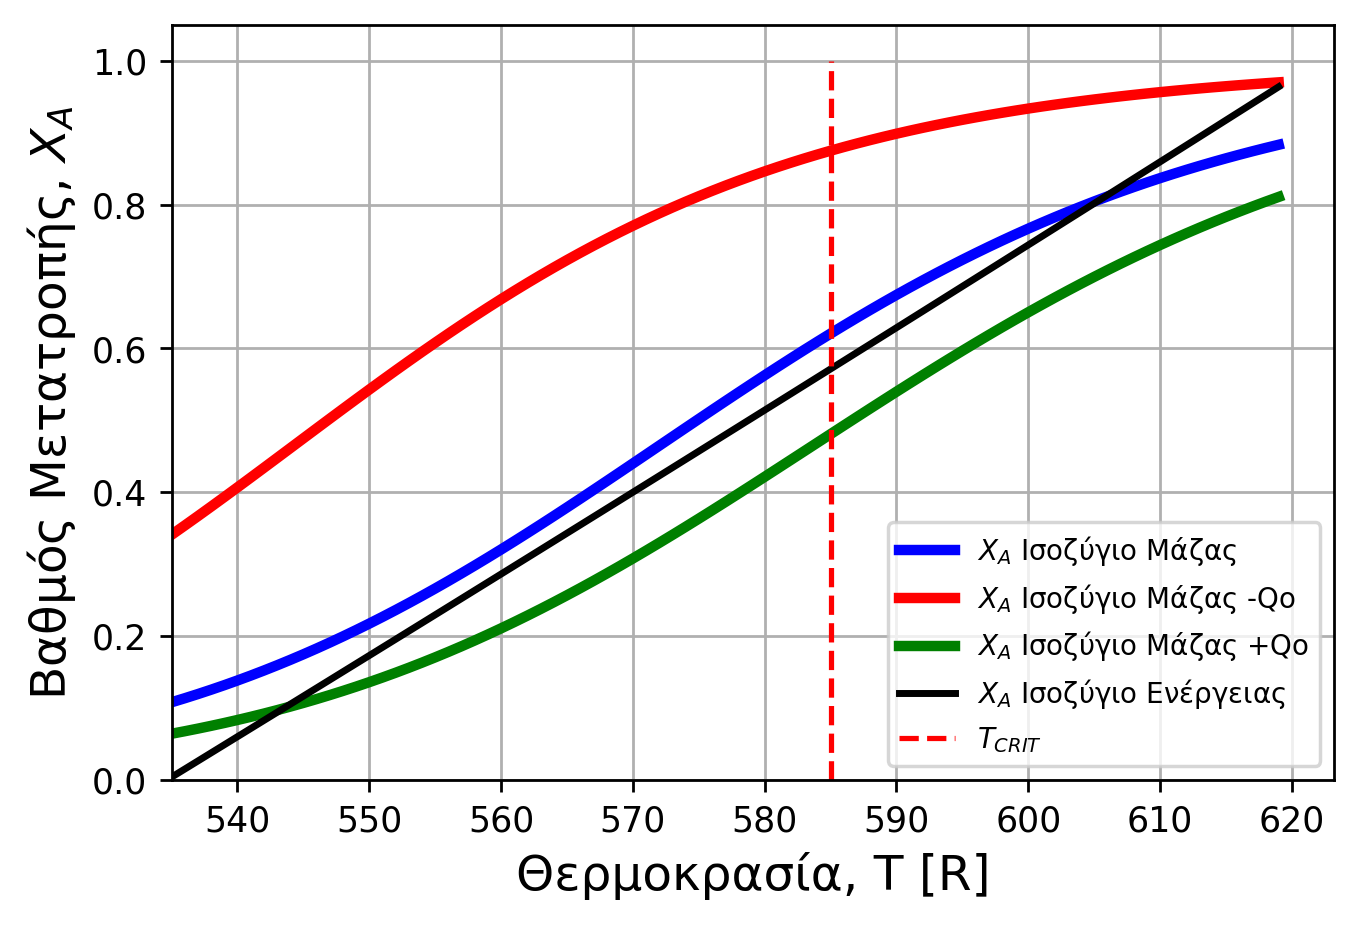

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Variable Model Parameters (Change these to reacreate the graphs from the lecture slides)
Qo = 326.3           # Volumetric Flowrate (Inlet) (ft^3/h) - Default 326.3
To = 534.67          # Reactor Inlet Temperature (R)        - Default 534.67

# Fixed Model Parameters
V = 40.1             # Reactor Volume (ft^3)
Tr = 527.67          # Reference Temperature (R)
CpA = 35             # Heat Capacity Propylene Oxide (BTU/lb-mol/R)
CpB = 18             # Heat Capacity Water (BTU/lb-mol/R)
CpC = 46             # Heat Capacity Propylene Glycol (BTU/lb-mol/R)
CpM = 19.5           # Heat Capacity Methanol (BTU/lb-mol/R)
k0 = 16.96e12        # Frequency coefficient (1/h)
E = 32400            # Activation Energy (kcal/kmol)
DHr_tr = 36000       # Heat of Reaction (kcal/kmol)
FAo = 43.04          # Propylene Oxide Inlet Stream (lb-mol/ft^3)
FBo = 804.75         # Water Inlet Stream (lb-mol/ft^3)
FMo = 71.89          # Methanol Inlet Stream (lb-mol/ft^3)
CAo = 0.132          # Inlet Stream Concentration Propylene Oxide (lb-mol/ft^3)
R = 1.987            # Universal Gas Constant (BTU/lb-mol/R)

# Temperature range (Rankine)
T = np.arange(535, 620)  # Temperature range from 535 to 640 R

# Auxiliary Equations
tau = V / Qo
tau2 = V/(Qo-250)
tau3 = V/(Qo+250)
k = k0 * np.exp(-E / (R * T))

# Mass and Energy Balances
X_mb = tau * k / (1 + tau * k)
X_mb2 = tau2*k / (1+tau2*k)
X_mb3 = tau3*k / (1+tau3*k)
X_eb = (FAo / FAo * CpA + FBo / FAo * CpB + FMo / FAo * CpM) * (T - To) / (DHr_tr + (CpC - CpA - CpB) * (T - Tr))


# Plotting
plt.figure(dpi=250)
plt.plot(T, X_mb, 'b-', linewidth=3, label='$X_A$ Ισοζύγιο Μάζας')
plt.plot(T, X_mb2, 'r-', linewidth=3, label='$X_A$ Ισοζύγιο Μάζας -Qo')
plt.plot(T, X_mb3, 'g-', linewidth=3, label='$X_A$ Ισοζύγιο Μάζας +Qo')
plt.plot(T, X_eb, 'k-', linewidth=2, label='$X_A$ Ισοζύγιο Ενέργειας')
plt.plot([585, 585], [0, 1], 'r--', label='$T_{{CRIT}}$', linewidth=1.5)
plt.grid(True)
plt.xlabel('Θερμοκρασία, Τ [R]', fontsize=14)
plt.ylabel('Βαθμός Μετατροπής, $X_A$', fontsize=14)

plt.legend(fontsize=8)
plt.xlim(left=535)  # X-axis starts at 0
plt.ylim(bottom=0)  # Y-axis starts at 275
#plt.title("Βαθμός Μετατροπής vs Θερμοκρασία")
plt.show()
